In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_train_identity = pd.read_csv('train_identity.csv')
df_train_transaction = pd.read_csv('train_transaction.csv')

df_test_identity = pd.read_csv('test_identity.csv')
df_test_transaction = pd.read_csv('test_transaction.csv')

df_sample_submission = pd.read_csv('sample_submission.csv')

In [3]:
print('df_train_identity:', df_train_identity.shape)
print('df_train_transaction:', df_train_transaction.shape)
print('df_test_identity:', df_test_identity.shape)
print('df_test_transaction:', df_test_transaction.shape)

df_train_identity: (144233, 41)
df_train_transaction: (590540, 394)
df_test_identity: (141907, 41)
df_test_transaction: (506691, 393)


In [4]:
df_train = pd.merge(df_train_transaction, df_train_identity, on='TransactionID', how='left')
df_test = pd.merge(df_test_transaction, df_test_identity, on='TransactionID', how='left')

In [5]:
print('df_train', df_train.shape)
print('df_test', df_test.shape)

df_train (590540, 434)
df_test (506691, 433)


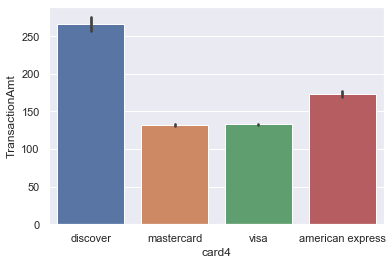

In [25]:
sns.barplot(df_train.card4, df_train.TransactionAmt)

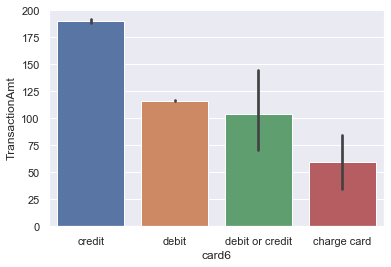

In [26]:
sns.barplot(df_train.card6, df_train.TransactionAmt)

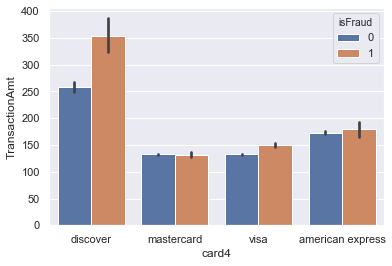

In [27]:
sns.barplot(df_train.card4, df_train.TransactionAmt, hue = df_train.isFraud)

In [6]:
df_na_rate = pd.DataFrame(df_train.isna().mean().sort_values(ascending=False), columns=['na_rate']).reset_index()
na_rate_columns = list(df_na_rate.loc[df_na_rate.na_rate >  0.4]['index'])

In [7]:
df_na_rate.head()

,index,na_rate
0,id_24,0.991962
1,id_25,0.991310
2,id_07,0.991271
3,id_08,0.991271
4,id_21,0.991264


In [8]:
df_na_rate.shape

(434, 2)

In [9]:
df_train=df_train.drop(columns=na_rate_columns)
df_test=df_test.drop(columns=na_rate_columns)

In [10]:
X_train = df_train.drop(columns=['isFraud'])
y_train = df_train['isFraud']
X_test =df_test

In [11]:
X_test_original = X_test.copy()
X_train = X_train.loc[:, 'C1':]
X_test = X_test.loc[:, 'C1':]

In [12]:
X_train = X_train.drop(columns=['M6'])
X_test = X_test.drop(columns=['M6'])

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()

In [15]:
X_train.fillna(-999, inplace=True)
X_test.fillna(-999, inplace=True)
model.fit(X_train, y_train)

C:\Users\rohan\Anaconda3\envs\rohanenv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rohan\Anaconda3\envs\rohanenv\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
p= model.predict(X_test)
p_prob = model.predict_proba(X_test)

In [18]:
p_prob = p_prob[:,1]

In [19]:
p_prob

array([6.11391099e-05, 8.56450945e-05, 3.25879030e-02, ...,
       4.88154769e-01, 4.88154769e-01, 4.95423654e-01])

In [20]:
result = pd.Series(p_prob, index=X_test_original['TransactionID'], name='isFraud')

In [21]:
result.to_csv('submission.csv', header=True)